# Independent Study Jun 2023

### Single Layer Perceptron

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
class Perceptron:
    def __init__(self, learningRate = 0.01, epoch = 20, activation = 'STEP'):
        self.learningRate = learningRate
        self.epoch = epoch
        print("Learning Rate: ", self.learningRate)
        print("Epoch: ", self.epoch)
        self.weightList = []
        self.bias = 0
        self.weightLog = None
        self.biasLog = None

        if activation == 'STEP':
            self.activation = self.stepActivation
            print('Step activation selected')
        if activation == 'SIGMOID':
            self.activation = self.sigmoidActivation
            print('Sigmoid activation selected')
        if activation == 'RELU':
            self.activation = self.sigmoidActivation
            print('ReLU activation selected')
        
    #Unit Step Activation    
    def stepActivation(self, inputVector, threshold=0):
        return np.where(inputVector >= threshold, 1, 0)
    
    #Sigmoid Function Activation
    def sigmoidActivation(self, inputVector):
        return 1 / (1 + np.exp(-inputVector))
    
    #ReLU Activiation
    def ReLuActivation(self, inputVector, threshold=0):
        # IN PROGRASS
        return
    
    #dot product
    def linearDotProduct(self, inputVector):
        return np.dot(inputVector, self.weightList) + self.bias
    
    def fitting(self, inputVector, answerVector):
        rows, columns = inputVector.shape

        #Weight, Bias, Logs Initialize
        self.weightList = np.zeros(columns)
        self.weightLog = np.zeros((self.epoch, columns))
        self.biasLog = np.zeros(self.epoch)

        for n in range(self.epoch):
            for index, sample in enumerate(inputVector):
                linearOutput = self.linearDotProduct(sample)
                predictedOutput = self.activation(linearOutput)
                #weight is learning rate times the differce between the answer and prediction
                updateWeight = self.learningRate  * (answerVector[index] - predictedOutput)
                self.weightList += sample * updateWeight
                self.bias += updateWeight

            #Logging Records
            self.weightLog[n] = self.weightList
            self.biasLog[n] = self.bias

    #predict corresponding output to inputVector
    def prediction(self, inputVector):
        linearOutput = self.linearDotProduct(inputVector)
        activatedOutput = self.activation(linearOutput)

        return activatedOutput
    
    #Accuracy Calculation
    def evaluation(self, answerVector, predictionVector):
        #number of exactly right predictions/ total number of predictions
        return np.sum(answerVector == predictionVector) / len(predictionVector)

Learning Rate:  0.1
Epoch:  1000
Sigmoid activation selected

Perceptron classification accuracy 0.375
User datapoint 0.5 , -0.5  belongs to Purple


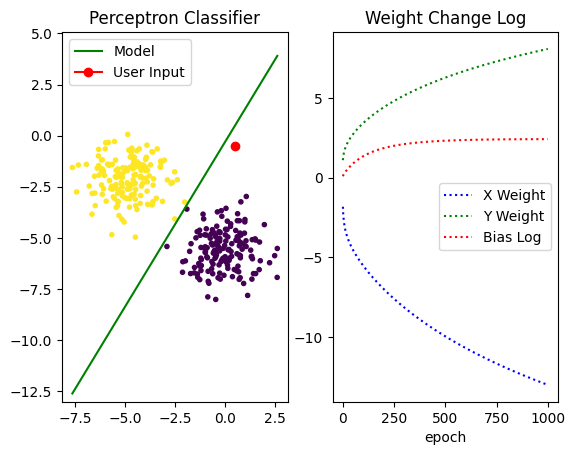

In [14]:
#random state determines the seed for random
#Two Clusters with 200 values each
datasetX, datasetY = datasets.make_blobs(n_samples=400,n_features=2,centers=2,cluster_std=1.0,random_state=50)
#20% of dataset will be test set
X_train, X_test, y_train, y_test = train_test_split(datasetX, datasetY, test_size=0.2, random_state=203)

#creating perceptron model with user-inputed Learning rate and epoch, activation funcitons
pLayer = Perceptron(float(input("Learning Rate: ")), int(input("Epoch: ")),input('Activation Function: '))
pLayer.fitting(X_train, y_train)

#Print Accuary

print("\nPerceptron classification accuracy", pLayer.evaluation(y_test, pLayer.prediction(X_test)))

#Graphing Borders
minimumX = np.amin(X_train[:,0])
maximumX = np.amax(X_train[:,0])
endpointMin = (-pLayer.weightList[0] * minimumX - pLayer.bias) / pLayer.weightList[1]
endpointMax = (-pLayer.weightList[0] * maximumX - pLayer.bias) / pLayer.weightList[1]
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])

#Logging Horizonta axis
t= np.arange(pLayer.epoch)
classes = ['Purple', 'Yellow']

#Graphing
fig = plt.figure()
#subpolot 1 will be the visualization of datapoints and model
fig1 = fig.add_subplot(1,2,1)
#model
fig1.plot([minimumX, maximumX],[endpointMin, endpointMax], color='g', label='Model')
#get User's datapoint
try:
    xIn = float(input("X input: "))
    yIn = float(input("Y input: "))
except:
    print('Error: Wrong Input')
#Draw user input
fig1.plot(xIn, yIn, color='r', marker='o', label='User Input')
#draw scatterplot of traning set
plt.scatter(X_train[:,0], X_train[:,1],marker='.',c=y_train)
#set borders
fig1.set_ylim([ymin - 5, ymax + 5])
plt.legend()
plt.title("Perceptron Classifier")

#change of wights and bias
fig2 = fig.add_subplot(1,2,2)
fig2.plot(t, pLayer.weightLog[:, 0], linestyle=':', color='b', label="X Weight")
fig2.plot(t, pLayer.weightLog[:, 1], linestyle=':', color='g', label="Y Weight")
fig2.plot(t, pLayer.biasLog, linestyle=':', color='r', label="Bias Log")
plt.xlabel("epoch")
plt.legend()
plt.title("Weight Change Log")

print('User datapoint', xIn, ',', yIn,' belongs to', classes[round(pLayer.prediction([xIn, yIn]))])